In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

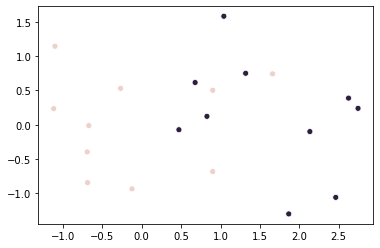

In [2]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=40).reshape(20, 2)
y = np.concatenate((np.ones(10), -np.ones(10)))
X[np.where(y == 1)] = X[np.where(y == 1)] + 1
sns.scatterplot(X[:, 0], X[:, 1], hue=y, legend=False)

In [3]:
from sklearn import svm

In [4]:
def plot_decision(model, X, y):
    
    # get the separating hyperplane
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X[:, 0].min(), X[:, 0].max())
    yy = a * xx - (model.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(figsize=(8, 6))
    plt.clf()
    x1range = X[:, 0].max() - X[:, 0].min()
    x2range = X[:, 1].max() - X[:, 1].min()
    plt.xlim(X[:, 0].min() - .1 * x1range, X[:, 0].max() + .1 * x1range)
    plt.ylim(X[:, 1].min() - .1 * x2range, X[:, 1].max() + .1 * x2range)
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')


Support vectors (9): [11 12 14 19  1  2  6  8  9]


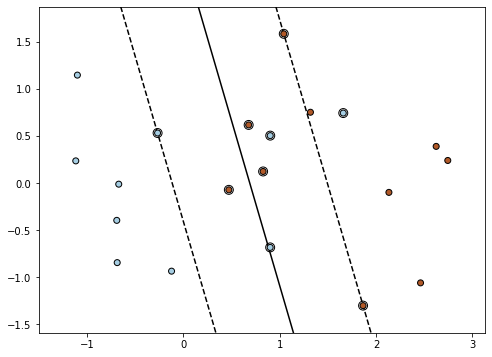

In [5]:
model = svm.SVC(kernel='linear', C=10, random_state=seed)
model.fit(X, y)

plot_decision(model, X, y)

print(f'Support vectors ({model.support_.size}): {model.support_}')

Support vectors (16): [10 11 12 13 14 15 17 19  1  2  4  5  6  7  8  9]


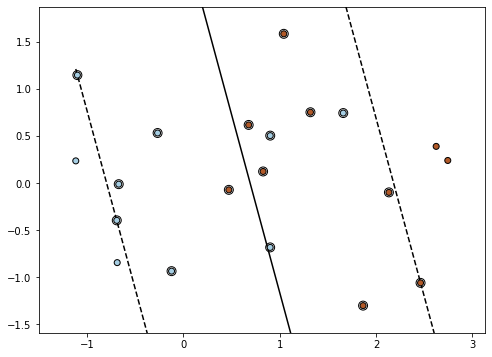

In [6]:
model = svm.SVC(kernel='linear', C=.1, random_state=seed)
model.fit(X, y)

plot_decision(model, X, y)

print(f'Support vectors ({model.support_.size}): {model.support_}')

In [7]:
from sklearn.model_selection import cross_val_score, KFold

array([0.65, 0.65, 0.75, 0.8 , 0.8 , 0.8 , 0.8 ])

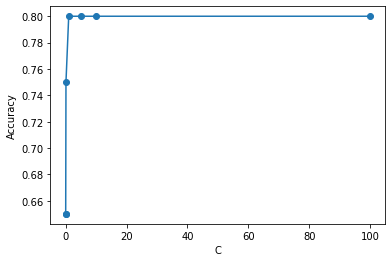

In [8]:
C = [0.001, 0.01, 0.1, 1, 5, 10, 100]
cv = KFold(n_splits=10, shuffle=True, random_state=seed)
models = [svm.SVC(kernel='linear', C=c, random_state=seed) for c in C]
scores = np.array([cross_val_score(model, X, y, cv=cv).mean() for model in models])
plt.plot(C, scores, 'o-')
plt.xticks()
plt.xlabel('C')
plt.ylabel('Accuracy')
scores

In [9]:
from sklearn.metrics import plot_confusion_matrix

In [10]:
X_test = np.random.normal(size=40).reshape(20, 2)
y_test = np.array([1, -1] * 10)
X_test[np.where(y_test == 1)] = X_test[np.where(y_test == 1)] + 1

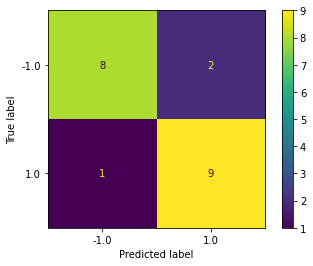

In [11]:
model = svm.SVC(kernel='linear', C=C[scores.argmax()], random_state=seed)
model.fit(X, y)

plot_confusion_matrix(model, X_test, y_test)

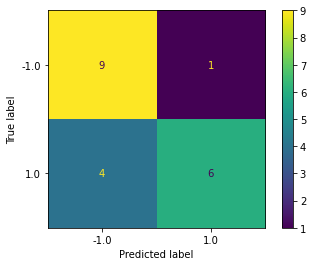

In [12]:
model = svm.SVC(kernel='linear', C=.01, random_state=seed)
model.fit(X, y)

plot_confusion_matrix(model, X_test, y_test)

<AxesSubplot:>

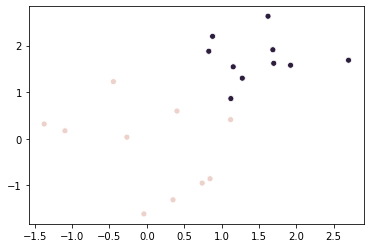

In [13]:
X = np.random.normal(size=40).reshape(20, 2)
y = np.concatenate((np.ones(10), -np.ones(10)))
X[np.where(y == 1)] = X[np.where(y == 1)] + 1.5
sns.scatterplot(X[:, 0], X[:, 1], hue=y, legend=False)

Support vectors (3): [10 19  6]


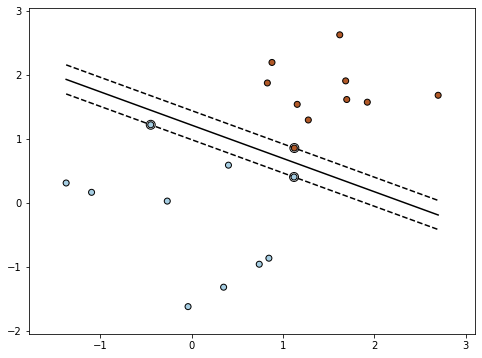

In [14]:
model = svm.SVC(kernel='linear', C=100, random_state=seed)
model.fit(X, y)

plot_decision(model, X, y)

print(f'Support vectors ({model.support_.size}): {model.support_}')

Support vectors (6): [10 11 19  0  6  8]


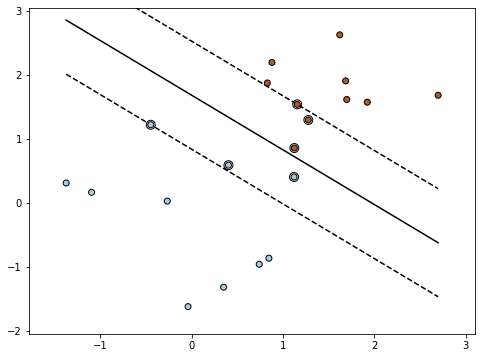

In [15]:
model = svm.SVC(kernel='linear', C=1, random_state=seed)
model.fit(X, y)

plot_decision(model, X, y)

print(f'Support vectors ({model.support_.size}): {model.support_}')

In [45]:
def plot_decision2(model, X, y):

    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(model.kernel)


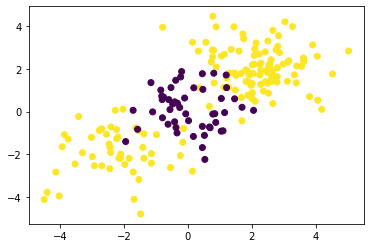

In [17]:
X = np.random.normal(size=400).reshape(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
y = np.concatenate((np.ones(150), -np.ones(50)))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=seed)

Support vectors (78): [151 152 155 157 158 159 160 161 167 169 170 171 173 175 176 178 182 183
 185 187 188 189 190 195 196 199  15  16  24  26  28  30  31  36  38  41
  42  43  45  49  52  58  59  61  64  66  70  77  84  88  91  92  97  99
 100 102 105 108 109 111 112 114 115 119 121 123 127 128 131 135 138 139
 141 143 144 145 146 149]


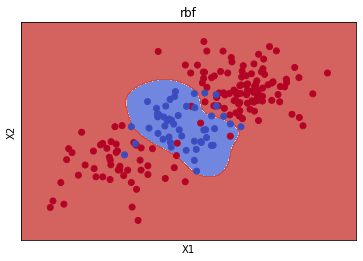

In [20]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=seed)
model.fit(X, y)

plot_decision2(model, X, y)

print(f'Support vectors ({model.support_.size}): {model.support_}')

{'C': 10, 'gamma': 0.5}

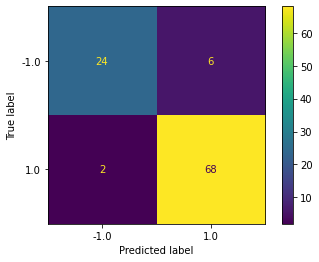

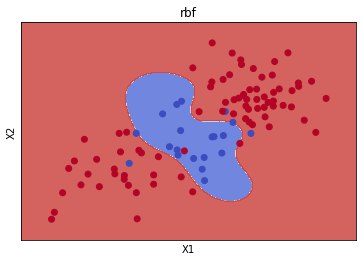

In [27]:
grid = {
    'gamma': [0.5,1,2,3,4],
    'C': [0.1,1,10,100,1000]
}
cv = KFold(n_splits=10, shuffle=True, random_state=seed)
gs1 = GridSearchCV(svm.SVC(kernel='rbf', probability=True, random_state=seed), grid, cv=cv).fit(X_train, y_train)
plot_confusion_matrix(gs1.best_estimator_, X_test, y_test)
plt.figure()
plot_decision2(gs1.best_estimator_, X_train, y_train)
gs1.best_params_

In [33]:
grid = {
    'degree': [1, 2, 3],
    'C': [0.1,1,10,100,1000],
    'kernel': ['poly']
}
cv = KFold(n_splits=10, shuffle=True, random_state=seed)
gs2 = GridSearchCV(svm.SVC(probability=True, random_state=seed), grid, cv=cv, n_jobs=3).fit(X_train, y_train)

{'C': 100, 'degree': 2, 'kernel': 'poly'}

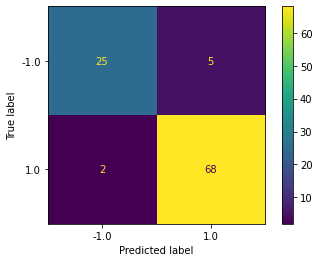

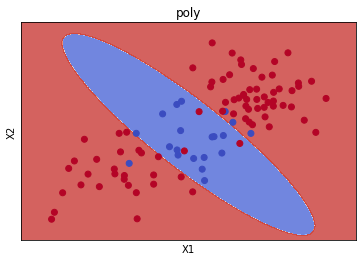

In [34]:
plot_confusion_matrix(gs2.best_estimator_, X_test, y_test)
plt.figure()
plot_decision2(gs2.best_estimator_, X_train, y_train)
gs2.best_params_

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

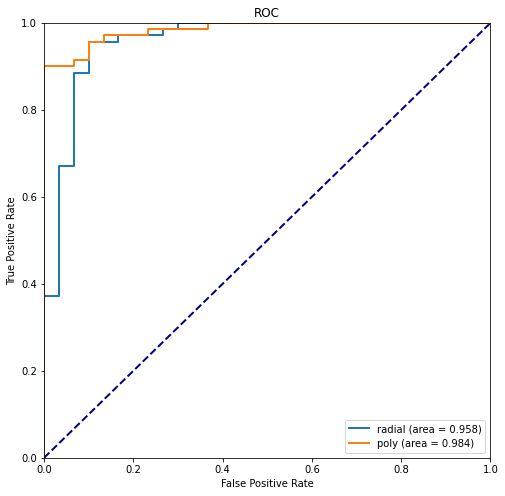

In [36]:
scores = [
    ('radial', gs1.best_estimator_.predict_proba(X_test)[:, 1]),
    ('poly', gs2.best_estimator_.predict_proba(X_test)[:, 1])
]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

for name, score in scores:
    fpr, tpr, thr = roc_curve(y_test, score)
    roc_auc = roc_auc_score(y_test, score)
    ax.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.3f})')
ax.legend(loc="lower right")    

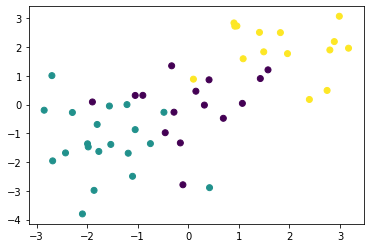

In [41]:
X = np.random.normal(size=100).reshape(50, 2)
y = np.concatenate((np.ones(15), -np.ones(15), np.zeros(20)))
X[np.where(y == 1)] = X[np.where(y == 1)] + 2
X[np.where(y == 0)] = X[np.where(y == 0)] - 1.5
plt.scatter(X[:, 0], X[:, 1], c=y)

Support vectors (40): [15 16 17 18 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 36 38 39 40 41
 43 44 45 46 47 48  0  1  4  6  7  9 10 11 13 14]


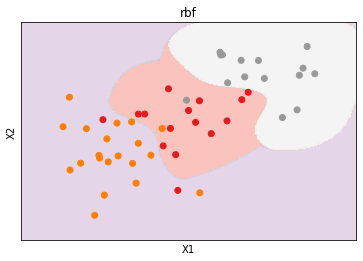

In [47]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=seed, decision_function_shape='ovo')
model.fit(X, y)

plot_decision2(model, X, y)

print(f'Support vectors ({model.support_.size}): {model.support_}')

In [70]:
dataset_file_train = '../datasets/khan_train.csv'

data = pd.read_csv(dataset_file_train, index_col=0)
data = data.transpose()
data['type'] = pd.Series(index=data.index, dtype=int)
for idx in data.index:
    if idx.startswith('EWS'):
        data['type'].loc[idx] = 1
    elif idx.startswith('RMS'):
        data['type'].loc[idx] = 2
    elif idx.startswith('BL'):
        data['type'].loc[idx] = 3
    elif idx.startswith('NB'):
        data['type'].loc[idx] = 4
data.type.value_counts()

/home/ivan2/projects/ISLR/venv/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


1    23
2    21
4    12
3     8
Name: type, dtype: int64

In [74]:
train, test = train_test_split(data, test_size=.25, random_state=seed)
X_train = train.drop(['type'], axis=1)
X_test = test.drop(['type'], axis=1)
y_train = train.type
y_test = test.type

In [77]:
model = svm.SVC(kernel='linear', C=1, random_state=seed, decision_function_shape='ovo')
model.fit(X_train, y_train)

print(f'Support vectors ({model.support_.size}): {model.support_}')

Support vectors (40): [ 0  3  5  8 16 17 22 23 31 37 38 39 40 43 45  4  7  9 10 11 13 15 20 27
 28 34 36 19 21 24 25 32  1  2  6 12 14 18 26 47]


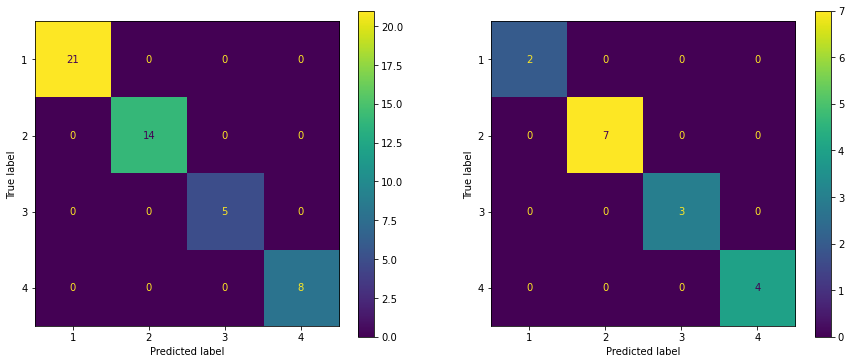

In [82]:
figs, axes = plt.subplots(ncols=2, figsize=[15,6])
plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
plot_confusion_matrix(model, X_test, y_test, ax=axes[1])